In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
pd.set_option('display.max_columns', None)

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# List the paths of the CSV files you want to combine
file_paths = ['E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00030-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00031-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00032-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']

# Read the CSV files into individual DataFrames
dataframes = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths]

# Combine the DataFrames into a single DataFrame
combined1_df = dataframes[0]
for df in dataframes[1:]:
    combined1_df = combined1_df.union(df)

# Write the combined DataFrame to a single CSV file
output_path = 'combined1_file.csv'
combined1_df.coalesce(1).write.csv(output_path, header=True, mode='overwrite')


In [3]:
df = pd.read_csv(r"C:\Users\nvnS\combined1_file.csv\part-00000-a1416f41-49cd-434a-a5a8-712e24c734e1-c000.csv")
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.004231,73.86,6.00,64.00,7.607282,7.607282,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.00,0.00,1.02,1.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,692.20,60.26,179.20,76.521850,37.290742,60.26,8.333110e+07,9.5,11.781817,52.784453,7852.951721,0.19,141.55,DDoS-PSHACK_Flood
1,2.998870,86.40,6.00,64.00,0.400169,0.400169,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.60,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.336111e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
2,0.000000,54.00,6.00,64.00,2.377469,2.377469,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.334384e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
3,0.045079,15967.00,17.00,64.00,6283.970327,6283.970327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.312371e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
4,0.041153,22955.72,16.61,63.36,13421.299698,13421.299698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.02,0.00,0.04,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,531.34,50.32,53.30,50.996277,1.144406,50.42,8.301214e+07,9.5,10.095333,1.589171,7.206423,0.18,141.55,DoS-UDP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694711,8.488524,108.00,6.00,64.00,0.235612,0.235612,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.00,0.00,2.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.333179e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
694712,0.096340,29945.00,17.00,64.00,105133.557023,105133.557023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.310616e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
694713,0.243185,35207.00,17.00,64.00,8905.367703,8905.367703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.309875e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
694714,0.098774,89.59,38.72,64.00,53573.359053,53573.359053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.00,0.03,0.72,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4936.10,377.54,503.09,473.096393,35.773402,475.24,8.366362e+07,9.5,29.727165,50.159886,4912.823316,0.38,141.55,Mirai-greip_flood


In [4]:
df['label'].value_counts()

DDoS-ICMP_Flood            107104
DDoS-UDP_Flood              80643
DDoS-TCP_Flood              67208
DDoS-PSHACK_Flood           61030
DDoS-RSTFINFlood            60165
DDoS-SYN_Flood              59951
DDoS-SynonymousIP_Flood     53172
DoS-UDP_Flood               49344
DoS-TCP_Flood               39866
DoS-SYN_Flood               30180
BenignTraffic               16529
Mirai-greeth_flood          14869
Mirai-udpplain              13307
Mirai-greip_flood           11239
DDoS-ICMP_Fragmentation      6701
MITM-ArpSpoofing             4499
DDoS-UDP_Fragmentation       4291
DDoS-ACK_Fragmentation       4206
DNS_Spoofing                 2668
Recon-HostDiscovery          1981
Recon-OSScan                 1448
Recon-PortScan               1212
DoS-HTTP_Flood               1073
VulnerabilityScan             573
DDoS-HTTP_Flood               463
DDoS-SlowLoris                352
DictionaryBruteForce          216
BrowserHijacking              102
SqlInjection                   87
CommandInjecti

In [5]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

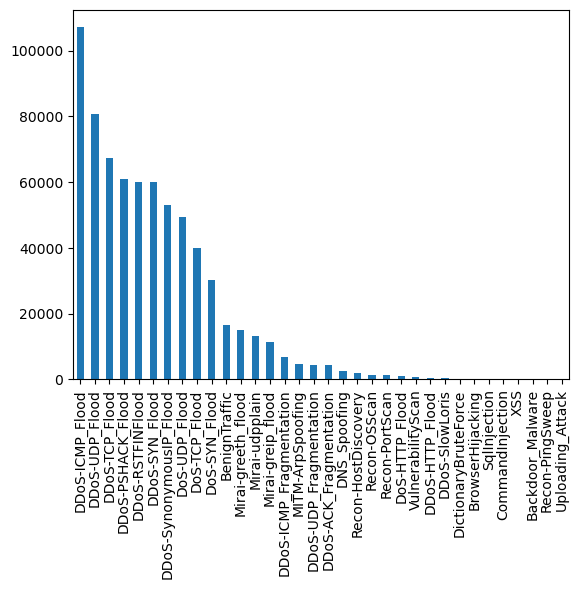

In [6]:
bar_graph('label')

In [7]:
df['label'].unique()

array(['DDoS-PSHACK_Flood', 'DDoS-SynonymousIP_Flood', 'DDoS-RSTFINFlood',
       'DDoS-UDP_Flood', 'DoS-UDP_Flood', 'DDoS-ICMP_Flood',
       'DoS-TCP_Flood', 'DDoS-SYN_Flood', 'DDoS-TCP_Flood',
       'DoS-SYN_Flood', 'Mirai-greeth_flood', 'DDoS-ACK_Fragmentation',
       'BenignTraffic', 'DDoS-ICMP_Fragmentation',
       'DDoS-UDP_Fragmentation', 'Mirai-udpplain', 'DNS_Spoofing',
       'Mirai-greip_flood', 'Recon-HostDiscovery', 'Recon-OSScan',
       'MITM-ArpSpoofing', 'Backdoor_Malware', 'Recon-PortScan',
       'DDoS-SlowLoris', 'DDoS-HTTP_Flood', 'DictionaryBruteForce',
       'DoS-HTTP_Flood', 'VulnerabilityScan', 'SqlInjection',
       'BrowserHijacking', 'CommandInjection', 'XSS', 'Recon-PingSweep',
       'Uploading_Attack'], dtype=object)

In [8]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.004231,73.86,6.00,64.00,7.607282,7.607282,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.00,0.00,1.02,1.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,692.20,60.26,179.20,76.521850,37.290742,60.26,8.333110e+07,9.5,11.781817,52.784453,7852.951721,0.19,141.55,8
1,2.998870,86.40,6.00,64.00,0.400169,0.400169,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.60,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.336111e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,12
2,0.000000,54.00,6.00,64.00,2.377469,2.377469,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.334384e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,9
3,0.045079,15967.00,17.00,64.00,6283.970327,6283.970327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.312371e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,14
4,0.041153,22955.72,16.61,63.36,13421.299698,13421.299698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.02,0.00,0.04,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,531.34,50.32,53.30,50.996277,1.144406,50.42,8.301214e+07,9.5,10.095333,1.589171,7.206423,0.18,141.55,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694711,8.488524,108.00,6.00,64.00,0.235612,0.235612,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.00,0.00,2.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.333179e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,8
694712,0.096340,29945.00,17.00,64.00,105133.557023,105133.557023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.310616e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,14
694713,0.243185,35207.00,17.00,64.00,8905.367703,8905.367703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.309875e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,14
694714,0.098774,89.59,38.72,64.00,53573.359053,53573.359053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.00,0.03,0.72,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4936.10,377.54,503.09,473.096393,35.773402,475.24,8.366362e+07,9.5,29.727165,50.159886,4912.823316,0.38,141.55,24


In [9]:
x=df.drop(columns=['label'])
y=df['label']

In [10]:
y

0          8
1         12
2          9
3         14
4         21
          ..
694711     8
694712    14
694713    14
694714    24
694715     9
Name: label, Length: 694716, dtype: int32

In [11]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [12]:
x_train

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
42287,0.010485,58.86,5.88,62.72,41.401466,41.401466,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.09,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,568.20,54.00,55.20,54.103885,0.327490,54.12,8.336209e+07,9.5,10.402302,0.464049,0.558638,0.20,141.55
13355,1.213974,86.40,6.00,64.00,1.471278,1.471278,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.60,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.336183e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
57093,3.442617,1923765.00,17.00,64.00,1008.672761,1008.672761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,5817.00,554.00,554.00,554.000000,0.000000,554.00,8.371145e+07,9.5,33.286634,0.000000,0.000000,0.00,141.55
147331,0.000000,54.00,6.00,64.00,2.660407,2.660407,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.00,0.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.333185e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
652208,0.000000,57.32,6.00,64.00,15.289098,15.289098,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.00,1.00,0.0,0.00,0.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,602.56,57.28,58.00,57.474570,0.304367,57.32,8.308906e+07,9.5,10.720924,0.430868,0.520493,0.18,141.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,0.047173,61.54,6.00,64.49,10.629703,10.629703,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.02,1.02,0.0,0.02,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.36,54.00,54.36,54.018982,0.080436,54.12,8.308919e+07,9.5,10.394156,0.114662,0.219157,0.03,141.55
152315,0.004698,72.87,6.16,65.91,135.939717,135.939717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.02,0.03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,597.79,54.00,81.05,55.982665,6.588480,59.05,8.307626e+07,9.5,10.572867,9.352595,331.374175,0.14,141.55
117952,0.000000,162.00,17.00,64.00,156.097619,156.097619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1701.00,162.00,162.00,162.000000,0.000000,162.00,8.300788e+07,9.5,18.000000,0.000000,0.000000,0.00,141.55
435829,0.000000,54.00,6.00,64.00,3.181481,3.181481,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.308882e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55


In [13]:
y_train

42287     12
13355     12
57093     25
147331     8
652208    10
          ..
359783    10
152315    13
117952    21
435829    10
305711    10
Name: label, Length: 555772, dtype: int32

In [14]:
print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 555772
Testing set: 138944


In [15]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [16]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

log_acc=clf.score(x_test,y_test)
pred=clf.predict(x_test)

log_prec=precision_score(y_test,pred,average='weighted')
log_rec=recall_score(y_test,pred,average='weighted')
log_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',log_acc)
print('precision:', log_prec)
print('recall: ', log_rec)
print('f1: ', log_f1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 0.8002432634730539
precision: 0.8079604821217988
recall:  0.8002432634730539
f1:  0.765243209539374


In [17]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(x_train,y_train)
rf_acc=clf1.score(x_test,y_test)
pred=clf1.predict(x_test)

rf_prec=precision_score(y_test,pred,average='weighted')
rf_rec=recall_score(y_test,pred,average='weighted')
rf_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',rf_acc)
print('precision:', rf_prec)
print('recall: ', rf_rec)
print('f1: ', rf_f1)

accuracy: 0.9928460386918471
precision: 0.9926545095831574
recall:  0.9928460386918471
f1:  0.9922880100017318


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.ensemble import AdaBoostClassifier

clf2=AdaBoostClassifier()
clf2.fit(x_train,y_train)
ada_acc=clf2.score(x_test,y_test)
pred=clf2.predict(x_test)

ada_prec=precision_score(y_test,pred,average='weighted')
ada_rec=recall_score(y_test,pred,average='weighted')
ada_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',ada_acc)
print('precision:', ada_prec)
print('recall: ', ada_rec)
print('f1: ', ada_f1)

accuracy: 0.6783740211883924
precision: 0.6994490090479003
recall:  0.6783740211883924
f1:  0.5996181063921451


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf3=GradientBoostingClassifier()
clf3.fit(x_train,y_train)
print('accuracy', clf3.score(x_test,y_test))

pred=clf3.predict(x_test)

print('precision: ', precision_score(y_test,pred,average='weighted'))
print('recall: ', recall_score(y_test,pred,average='weighted'))
print('f1:', f1_score(y_test,pred,average='weighted'))

# neural network

In [19]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout,SimpleRNN,Input,GRU
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.utils.np_utils import to_categorical


In [20]:
Y = to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(555772, 46)
(555772, 34)
(138944, 46)
(138944, 34)


In [22]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [23]:

input_=Input(shape=(x_train.shape[1],))
d=Dense(100, activation='relu')(input_)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
output = Dense(34, activation='softmax')(d)

model = Model(inputs=input_, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100 

In [24]:
#callbacks: checkpoint, csv_logger
filepath="nn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_log=CSVLogger('nn_log.csv',separator=',',append=False)
callbacks_list=[checkpoint,csv_log]

history=model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/20
6939/6948 [============================>.] - ETA: 0s - loss: 0.4494 - accuracy: 0.8006
Epoch 1: val_accuracy improved from -inf to 0.81918, saving model to nn.hdf5
6948/6948 [==============================] - 13s 2ms/step - loss: 0.4494 - accuracy: 0.8006 - val_loss: 0.4019 - val_accuracy: 0.8192
Epoch 2/20
6928/6948 [============================>.] - ETA: 0s - loss: 0.3188 - accuracy: 0.8637
Epoch 2: val_accuracy improved from 0.81918 to 0.90105, saving model to nn.hdf5
6948/6948 [==============================] - 12s 2ms/step - loss: 0.3186 - accuracy: 0.8638 - val_loss: 0.2396 - val_accuracy: 0.9010
Epoch 3/20
6941/6948 [============================>.] - ETA: 0s - loss: 0.1601 - accuracy: 0.9379
Epoch 3: val_accuracy improved from 0.90105 to 0.95721, saving model to nn.hdf5
6948/6948 [==============================] - 12s 2ms/step - loss: 0.1601 - accuracy: 0.9379 - val_loss: 0.1106 - val_accuracy: 0.9572
Epoch 4/20
6938/6948 [============================>.] - ETA: 0s - l

Text(0, 0.5, 'accuracy')

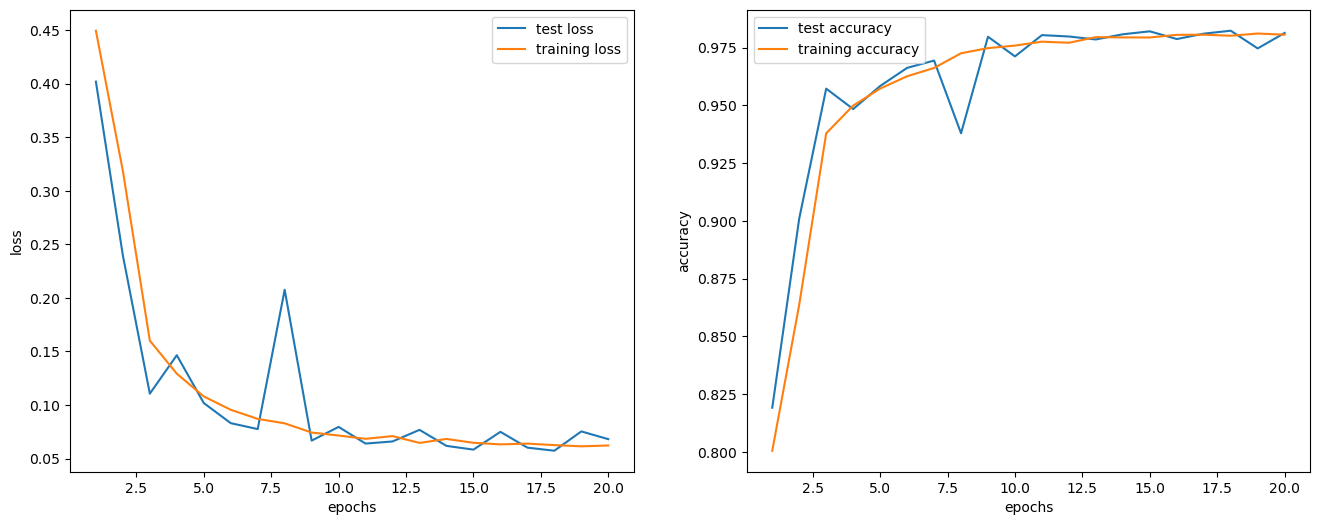

In [25]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(np.arange(1,21,1),history.history['val_loss'], label='test loss')
plt.plot(np.arange(1,21,1),history.history['loss'], label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(np.arange(1,21,1),history.history['val_accuracy'], label='test accuracy')
plt.plot(np.arange(1,21,1),history.history['accuracy'], label='training accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [26]:
#load the best model
dnn=load_model('nn.hdf5')

#getting the probabilities
pred=dnn.predict(x_test)
pred
dnn_pred=pred.argmax(axis=1)
y_test1=y_test.argmax(axis=1)
accuracy_score(y_test.argmax(axis=1),pred.argmax(axis=1))
print('Precision score: ',precision_score(y_test1, dnn_pred, average='weighted'))
print('Recall score: ',recall_score(y_test1, dnn_pred,average='weighted'))
print('F1 score: ',f1_score(y_test1, dnn_pred,average='weighted'))

4342/4342 [==============================] - 3s 749us/step
Precision score:  0.981120819405821
Recall score:  0.9823957853523722
F1 score:  0.9810511731683144


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
